### EDA

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sujithmandala/obesity-classification-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.08k/1.08k [00:00<00:00, 484kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sujithmandala/obesity-classification-dataset/versions/1


In [ ]:
import pandas as pd

df = pd.read_csv("/root/.cache/kagglehub/datasets/sujithmandala/obesity-classification-dataset/versions/1/Obesity Classification.csv")
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [ ]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


In [ ]:
df.shape

(108, 7)

In [ ]:
df['Label'].unique()

array(['Normal Weight', 'Overweight', 'Underweight', 'Obese'],
      dtype=object)

### Data Preprocessing

In [ ]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
Label,0


In [ ]:
def convert_to_numeric(x):
  if x == 'Underweight':
    return 0
  elif x == 'Normal Weight':
    return 1
  elif x == 'Overweight':
    return 2
  elif x == 'Obese':
    return 3


df['Label'] = df['Label'].apply(convert_to_numeric)
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175,80,25.3,1
1,2,30,0,160,60,22.5,1
2,3,35,1,180,90,27.3,2
3,4,40,0,150,50,20.0,0
4,5,45,1,190,100,31.2,3


In [ ]:
df.shape

(108, 7)

<Axes: >

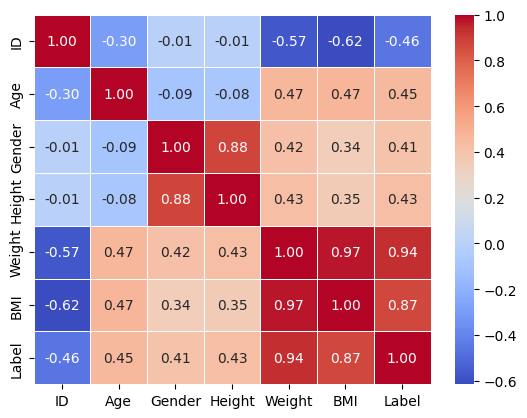

In [ ]:
import numpy as np
import seaborn as sns

figsize=(10, 7.5)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='white')

Diambil 2 kolom dengan korelasi terkuat yaitu Weight dan BMI:

In [ ]:
df = df[['Weight', 'BMI', 'Label']]
df.head()

,Weight,BMI,Label
0,80,25.3,1
1,60,22.5,1
2,90,27.3,2
3,50,20.0,0
4,100,31.2,3


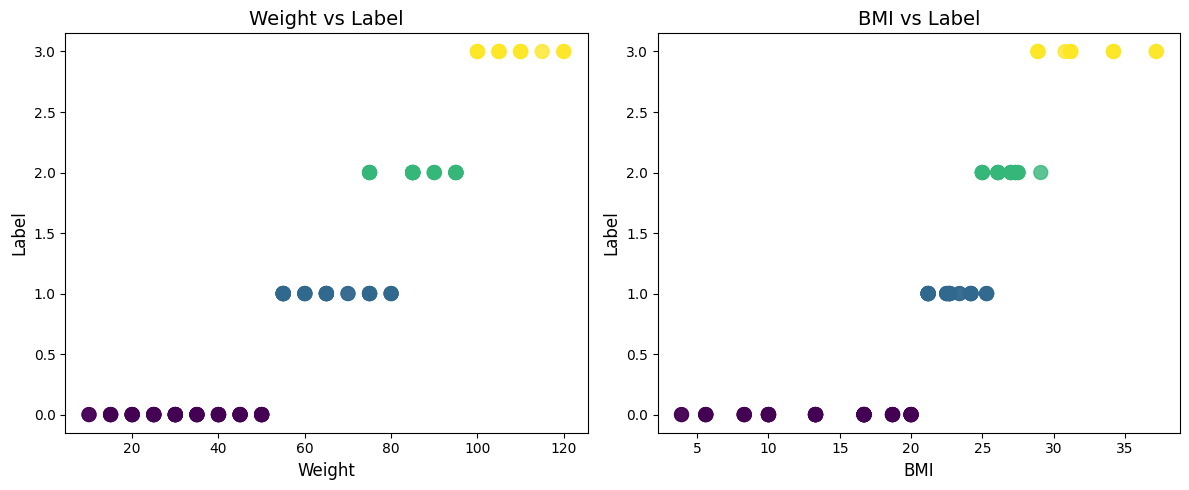

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['Weight'], df['Label'], c=df['Label'], cmap='viridis', s=100, alpha=0.8)
plt.title("Weight vs Label", fontsize=14)
plt.xlabel("Weight", fontsize=12)
plt.ylabel("Label", fontsize=12)

# Plot BMI vs Label
plt.subplot(1, 2, 2)
plt.scatter(df['BMI'], df['Label'], c=df['Label'], cmap='viridis', s=100, alpha=0.8)
plt.title("BMI vs Label", fontsize=14)
plt.xlabel("BMI", fontsize=12)
plt.ylabel("Label", fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
for i in range(4):
  filtered_data = df[df['Label'] == i]
  max_weight = filtered_data['Weight'].max()
  min_weight = filtered_data['Weight'].min()
  print(f"Label {i}: Min Weight = {min_weight}, Max Weight = {max_weight}")

Label 0: Min Weight = 10, Max Weight = 50
Label 1: Min Weight = 55, Max Weight = 80
Label 2: Min Weight = 75, Max Weight = 95
Label 3: Min Weight = 100, Max Weight = 120


In [ ]:
for i in range(4):
  filtered_data = df[df['Label'] == i]
  max_BMI = filtered_data['BMI'].max()
  min_BMI = filtered_data['BMI'].min()
  print(f"Label {i}: Min BMI = {min_BMI}, Max BMI = {max_BMI}")

Label 0: Min BMI = 3.9, Max BMI = 20.0
Label 1: Min BMI = 21.2, Max BMI = 25.3
Label 2: Min BMI = 25.0, Max BMI = 29.1
Label 3: Min BMI = 28.9, Max BMI = 37.2


## Model Mamdani

In [ ]:
!pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 17.7 MB/s eta 0:00:00


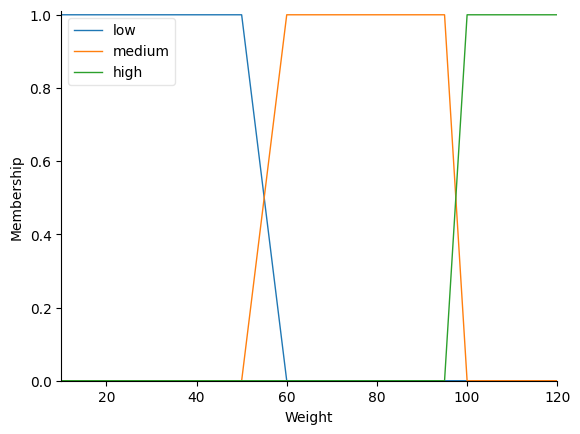

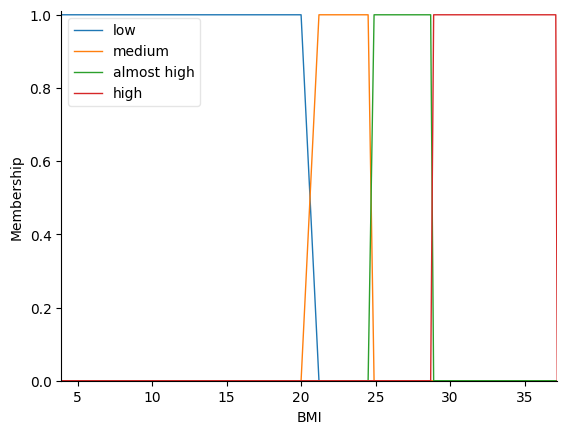

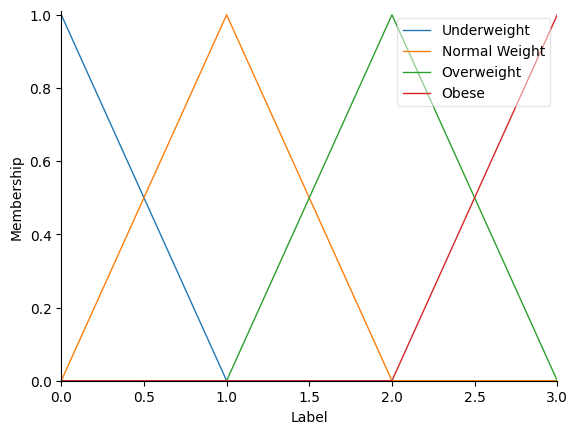

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

#Define Semesta
x_weight = ctrl.Antecedent(np.arange(10, 121, 1), 'Weight')
x_bmi = ctrl.Antecedent(np.arange(3.9, 37.3, 0.1), 'BMI')
x_label = ctrl.Consequent(np.arange(0, 4, 1), 'Label')

# Membership Functions untuk Weight
x_weight['low'] = fuzz.trapmf(x_weight.universe, [10, 10, 50, 60])
x_weight['medium'] = fuzz.trapmf(x_weight.universe, [50, 60, 95, 100])
x_weight['high'] = fuzz.trapmf(x_weight.universe, [95, 100, 120, 120])

# Membership Functions untuk BMI
x_bmi['low'] = fuzz.trapmf(x_bmi.universe, [3.9, 3.9, 20, 21.2])
x_bmi['medium'] = fuzz.trapmf(x_bmi.universe, [20, 21.2, 24.5, 24.9])
x_bmi['almost high'] = fuzz.trapmf(x_bmi.universe, [24.5, 24.9, 28.7, 28.9])
x_bmi['high'] = fuzz.trapmf(x_bmi.universe, [28.7, 28.9, 37.2, 37.2])

#Membership functions untuk label
x_label['Underweight'] = fuzz.trapmf(x_label.universe, [0, 0, 0, 0.5])
x_label['Normal Weight'] = fuzz.trapmf(x_label.universe, [0.5, 1, 1, 1.5])
x_label['Overweight'] = fuzz.trapmf(x_label.universe, [1.5, 2, 2, 2.5])
x_label['Obese'] = fuzz.trapmf(x_label.universe, [2.5, 3, 3, 3.5])

# Plot Membership Functions untuk Weight
x_weight.view()

# Plot Membership Functions untuk BMI
x_bmi.view()

# Plot Membership Functions untuk Label
x_label.view()

In [ ]:
rule1 = ctrl.Rule(x_weight['low'] & x_bmi['low'], x_label['Underweight'])
rule2 = ctrl.Rule(x_weight['low'] & x_bmi['medium'], x_label['Underweight'])
rule3 = ctrl.Rule(x_weight['low'] & x_bmi['almost high'], x_label['Underweight'])
rule4 = ctrl.Rule(x_weight['low'] & x_bmi['high'], x_label['Normal Weight'])

rule5 = ctrl.Rule(x_weight['medium'] & x_bmi['low'], x_label['Normal Weight'])
rule6 = ctrl.Rule(x_weight['medium'] & x_bmi['medium'], x_label['Normal Weight'])
rule7 = ctrl.Rule(x_weight['medium'] & x_bmi['almost high'], x_label['Overweight'])
rule8 = ctrl.Rule(x_weight['medium'] & x_bmi['high'], x_label['Overweight'])

rule9 = ctrl.Rule(x_weight['high'] & x_bmi['low'], x_label['Overweight'])
rule10 = ctrl.Rule(x_weight['high'] & x_bmi['medium'], x_label['Overweight'])
rule11 = ctrl.Rule(x_weight['high'] & x_bmi['almost high'], x_label['Overweight'])
rule12 = ctrl.Rule(x_weight['high'] & x_bmi['high'], x_label['Obese'])

In [ ]:
inference_rule = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
sistem_obesitas = ctrl.ControlSystemSimulation(inference_rule)

In [ ]:
#Tes
sistem_obesitas.input['Weight'] = 97.5
sistem_obesitas.input['BMI'] = 20.3
sistem_obesitas.compute()

1.4999999999999998
 Antecedents 
Antecedent: Weight                  = 97.5
  - low                             : 0.0
  - medium                          : 0.5
  - high                            : 0.5
Antecedent: BMI                     = 20.3
  - low                             : 0.7499999999999992
  - medium                          : 0.2500000000000007
  - almost high                     : 0.0
  - high                            : 0.0

 Rules 
RULE #0:
  IF Weight[low] AND BMI[low] THEN Label[Underweight]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - Weight[low]                                            : 0.0
  - BMI[low]                                               : 0.7499999999999992
                                  Weight[low] AND BMI[low] = 0.0
  Activation (THEN-clause):
                                        Label[Underweight] : 0.0

RULE #1:
  IF Weight[low] AND BMI[medium] THEN Label[Underweight]
	AND aggregation func

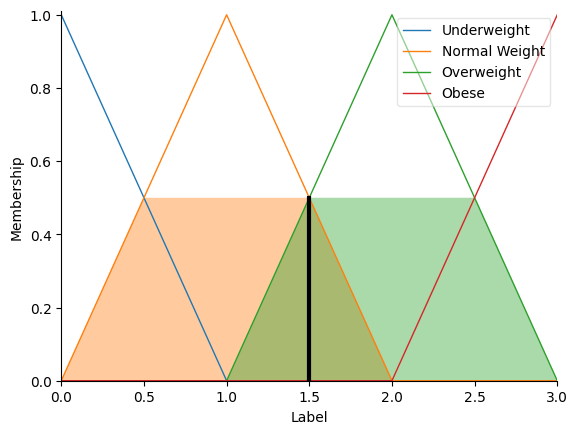

In [ ]:
print(sistem_obesitas.output['Label'])
x_label.view(sim=sistem_obesitas)
print(sistem_obesitas.print_state())

In [ ]:
def sistemObesitas(a, b):
  sistem_obesitas.input['Weight'] = a
  sistem_obesitas.input['BMI'] = b
  sistem_obesitas.compute()
  return sistem_obesitas.output['Label']

df_mamdani = df.copy()
df_mamdani['NK'] = df.apply(lambda x: sistemObesitas(x['Weight'], x['BMI']), axis=1)
df_mamdani

,Weight,BMI,Label,NK
0,80,25.3,1,2.000000
1,60,22.5,1,1.000000
2,90,27.3,2,2.000000
3,50,20.0,0,0.333333
4,100,31.2,3,2.666667
...,...,...,...,...
103,10,3.9,0,0.333333
104,10,3.9,0,0.333333
105,15,5.6,0,0.333333
106,15,5.6,0,0.333333


In [ ]:
def NK_to_Label(x):
  if x < 0.5:
    return 0
  elif x >= 0.5 and x < 1.5 :
    return 1
  elif x >= 1.5 and x < 2.5 :
    return 2
  else:
    return 3

df_mamdani['Prediksi'] = df_mamdani['NK'].apply(NK_to_Label)
df_mamdani

,Weight,BMI,Label,NK,Prediksi
0,80,25.3,1,2.000000,2
1,60,22.5,1,1.000000,1
2,90,27.3,2,2.000000,2
3,50,20.0,0,0.333333,0
4,100,31.2,3,2.666667,3
...,...,...,...,...,...
103,10,3.9,0,0.333333,0
104,10,3.9,0,0.333333,0
105,15,5.6,0,0.333333,0
106,15,5.6,0,0.333333,0


In [ ]:
y_actual = df_mamdani['Label'].tolist()
y_pred = df_mamdani['Prediksi'].tolist()

correct_predictions = sum(np.array(y_pred) == np.array(y_actual))
accuracy = (correct_predictions / len(y_actual)) * 100
print(f"Akurasi Sistem Fuzzy: {accuracy:.2f}%")

Akurasi Sistem Fuzzy: 97.22%


### Evaluasi

In [ ]:
df_mamdani[df_mamdani['Label'] != df_mamdani['Prediksi']]

,Weight,BMI,Label,NK,Prediksi
0,80,25.3,1,2.0,2
12,80,25.3,1,2.0,2
20,80,25.3,1,2.0,2


## Model Sugeno

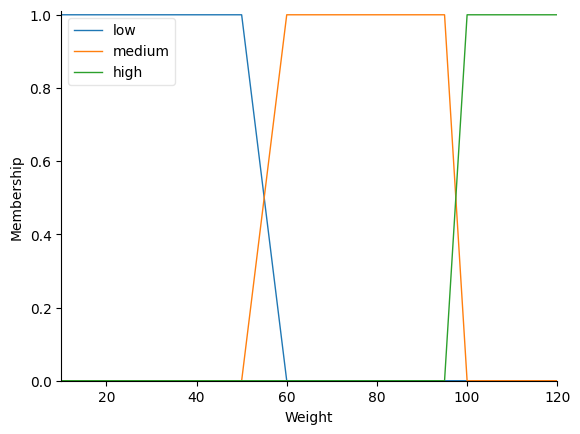

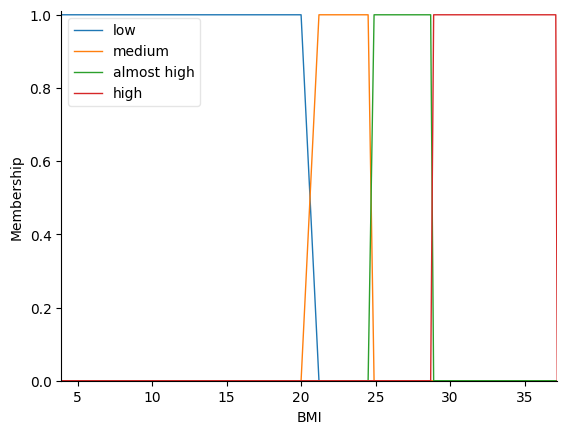

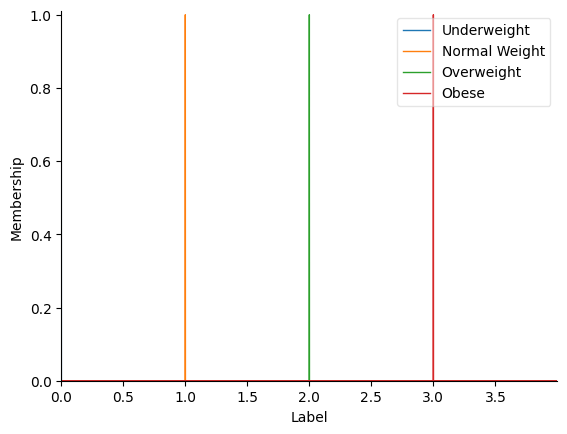

In [ ]:
#Define Semesta
x_weight = ctrl.Antecedent(np.arange(10, 121, 1), 'Weight')
x_bmi = ctrl.Antecedent(np.arange(3.9, 37.3, 0.1), 'BMI')
x_label = ctrl.Consequent(np.arange(0, 4, 0.001), 'Label')

# Membership Functions untuk Weight
x_weight['low'] = fuzz.trapmf(x_weight.universe, [10, 10, 50, 60])
x_weight['medium'] = fuzz.trapmf(x_weight.universe, [50, 60, 95, 100])
x_weight['high'] = fuzz.trapmf(x_weight.universe, [95, 100, 120, 120])

# Membership Functions untuk BMI
x_bmi['low'] = fuzz.trapmf(x_bmi.universe, [3.9, 3.9, 20, 21.2])
x_bmi['medium'] = fuzz.trapmf(x_bmi.universe, [20, 21.2, 24.5, 24.9])
x_bmi['almost high'] = fuzz.trapmf(x_bmi.universe, [24.5, 24.9, 28.7, 28.9])
x_bmi['high'] = fuzz.trapmf(x_bmi.universe, [28.7, 28.9, 37.2, 37.2])

#Membership functions untuk label
x_label['Underweight'] = fuzz.trimf(x_label.universe, [0, 0, 0])
x_label['Normal Weight'] = fuzz.trimf(x_label.universe, [1, 1, 1])
x_label['Overweight'] = fuzz.trimf(x_label.universe, [2, 2, 2])
x_label['Obese'] = fuzz.trimf(x_label.universe, [3, 3, 3])

# Plot Membership Functions untuk Weight
x_weight.view()

# Plot Membership Functions untuk BMI
x_bmi.view()

# Plot Membership Functions untuk Label
x_label.view()

In [ ]:
rule1 = ctrl.Rule(x_weight['low'] & x_bmi['low'], x_label['Underweight'])
rule2 = ctrl.Rule(x_weight['low'] & x_bmi['medium'], x_label['Underweight'])
rule3 = ctrl.Rule(x_weight['low'] & x_bmi['almost high'], x_label['Underweight'])
rule4 = ctrl.Rule(x_weight['low'] & x_bmi['high'], x_label['Normal Weight'])

rule5 = ctrl.Rule(x_weight['medium'] & x_bmi['low'], x_label['Normal Weight'])
rule6 = ctrl.Rule(x_weight['medium'] & x_bmi['medium'], x_label['Normal Weight'])
rule7 = ctrl.Rule(x_weight['medium'] & x_bmi['almost high'], x_label['Overweight'])
rule8 = ctrl.Rule(x_weight['medium'] & x_bmi['high'], x_label['Overweight'])

rule9 = ctrl.Rule(x_weight['high'] & x_bmi['low'], x_label['Overweight'])
rule10 = ctrl.Rule(x_weight['high'] & x_bmi['medium'], x_label['Overweight'])
rule11 = ctrl.Rule(x_weight['high'] & x_bmi['almost high'], x_label['Overweight'])
rule12 = ctrl.Rule(x_weight['high'] & x_bmi['high'], x_label['Obese'])

In [ ]:
inference_rule = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
sistem_obesitas = ctrl.ControlSystemSimulation(inference_rule)

In [ ]:
#Tes
sistem_obesitas.input['Weight'] = 120
sistem_obesitas.input['BMI'] = 37.2
sistem_obesitas.compute()

3
 Antecedents 
Antecedent: Weight                  = 120
  - low                             : 0.0
  - medium                          : 0.0
  - high                            : 1.0
Antecedent: BMI                     = 37.2
  - low                             : 0.0
  - medium                          : 0.0
  - almost high                     : 0.0
  - high                            : 2.8421709430404007e-13

 Rules 
RULE #0:
  IF Weight[low] AND BMI[low] THEN Label[Underweight]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - Weight[low]                                            : 0.0
  - BMI[low]                                               : 0.0
                                  Weight[low] AND BMI[low] = 0.0
  Activation (THEN-clause):
                                        Label[Underweight] : 0.0

RULE #1:
  IF Weight[low] AND BMI[medium] THEN Label[Underweight]
	AND aggregation function : fmin
	OR aggregation function  : fmax

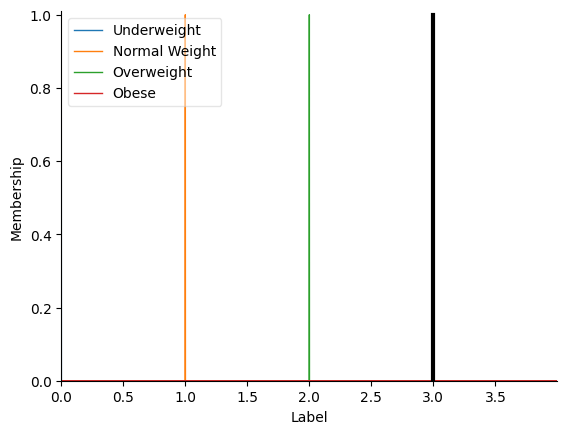

In [ ]:
print(round(sistem_obesitas.output['Label']))
x_label.view(sim=sistem_obesitas)
print(sistem_obesitas.print_state())

In [ ]:
def sistemObesitas(a, b):
  sistem_obesitas.input['Weight'] = a
  sistem_obesitas.input['BMI'] = b
  sistem_obesitas.compute()
  return sistem_obesitas.output['Label']

df_sugeno = df.copy()
df_sugeno['NK'] = df.apply(lambda x: sistemObesitas(x['Weight'], x['BMI']), axis=1)
df_sugeno

,Weight,BMI,Label,NK
0,80,25.3,1,2.000000
1,60,22.5,1,1.000000
2,90,27.3,2,2.000000
3,50,20.0,0,0.000333
4,100,31.2,3,3.000000
...,...,...,...,...
103,10,3.9,0,0.000333
104,10,3.9,0,0.000333
105,15,5.6,0,0.000333
106,15,5.6,0,0.000333


In [ ]:
df_sugeno['Prediksi'] = round(df_sugeno['NK']).astype(int)
df_sugeno

,Weight,BMI,Label,NK,Prediksi
0,80,25.3,1,2.000000,2
1,60,22.5,1,1.000000,1
2,90,27.3,2,2.000000,2
3,50,20.0,0,0.000333,0
4,100,31.2,3,3.000000,3
...,...,...,...,...,...
103,10,3.9,0,0.000333,0
104,10,3.9,0,0.000333,0
105,15,5.6,0,0.000333,0
106,15,5.6,0,0.000333,0


In [ ]:
y_actual = df_sugeno['Label'].tolist()
y_pred = df_sugeno['Prediksi'].tolist()

correct_predictions = sum(np.array(y_pred) == np.array(y_actual))
accuracy = (correct_predictions / len(y_actual)) * 100
print(f"Akurasi Sistem Fuzzy: {accuracy:.2f}%")

Akurasi Sistem Fuzzy: 97.22%


### Evaluasi

In [ ]:
df_sugeno[df_sugeno['Label'] != df_sugeno['Prediksi']]

,Weight,BMI,Label,NK,Prediksi
0,80,25.3,1,2.0,2
12,80,25.3,1,2.0,2
20,80,25.3,1,2.0,2
